In [2]:
#importing necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re
#creating a dataframe
df = pd.read_csv('Before_Cleaning.csv')

In [3]:
#cleaning the dataset
def cleannumerical(cdf):
   
    df[cdf] =df[cdf].fillna(np.round(np.mean(df[cdf]),decimals=0))
    return df[cdf]

def cleancategorical(cdf):
    count=0
    df[cdf] = df[cdf].fillna(25)
    for index,value in df[cdf].iteritems():
        if(value==25):
            df[cdf].loc[index]=df[cdf].loc[index-1]
    return df[cdf]    
columnsnumerical = ['subscriber','tags_count','trend_day_count','trend_tag_highest','trend_tag_total','trend.publish.diff','tag_appeared_in_title_count','views','likes','dislikes','publish_hour','category_id']
columnscategorical =['comments_disabled','ratings_disabled','tag_appeared_in_title']

for cdf in columnsnumerical:
    df[cdf] =cleannumerical(cdf)
for cdf in columnscategorical:
    df[cdf] =cleancategorical(cdf) 
randomstring = "xTgdmeWSuV"
count=0;
for index,value in df['video_id'].iteritems():
    if(value=="#NAME?"):
        df['video_id'].loc[index] = randomstring + str(count);
        count += 1

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


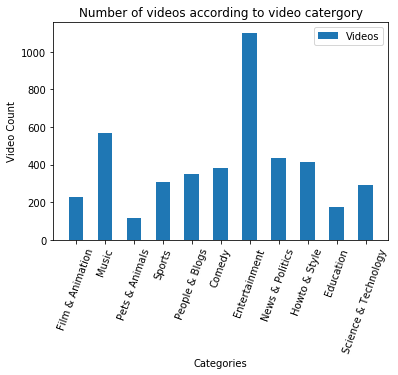

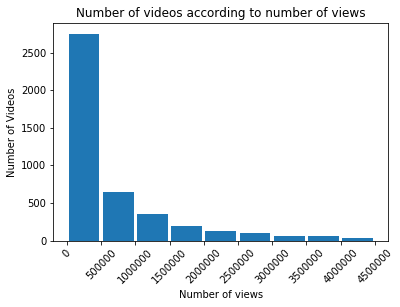

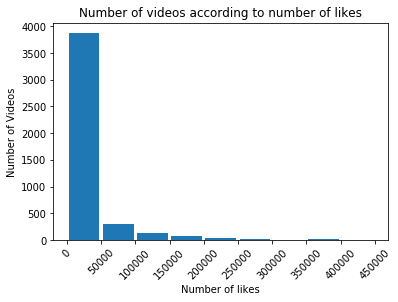

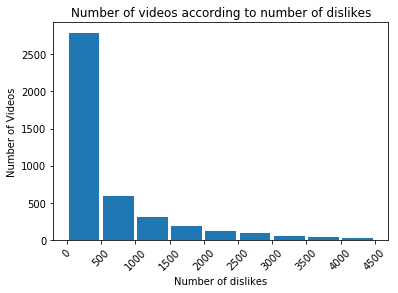

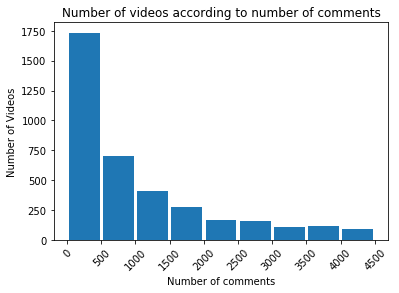

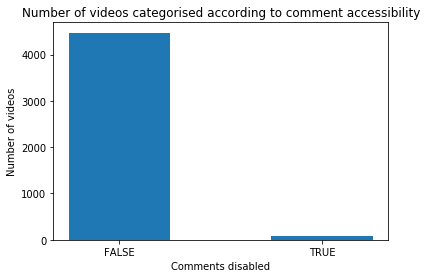

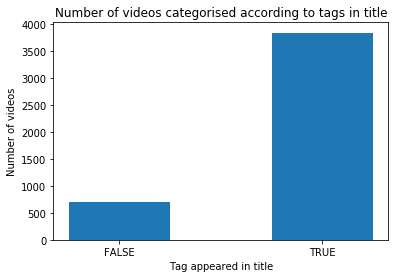

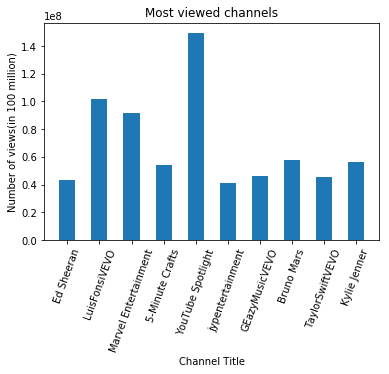

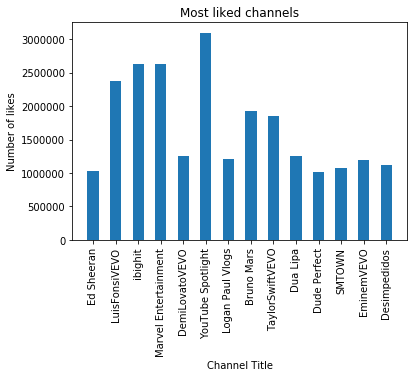

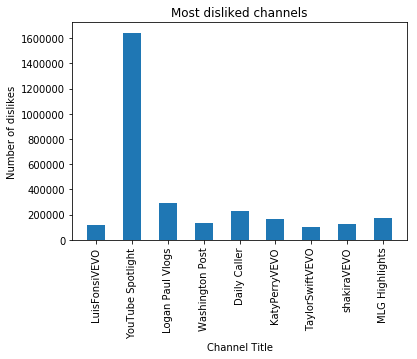

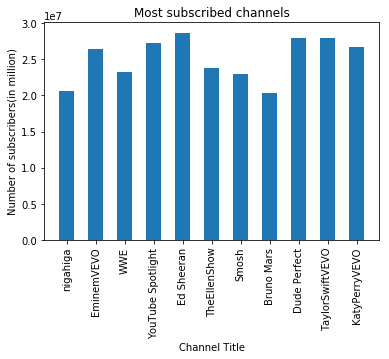

In [132]:
categoryvid ={1:"Film & Animation",2:"Autos & Vehicles",10:"Music",15:"Pets & Animals",17:"Sports",18:"Short Movies",19:"Travel & Events",20:"Gaming",21:"Videoblogging",22:"People & Blogs",23:"Comedy",24:"Entertainment",25:"News & Politics",26:"Howto & Style",27:"Education",28:"Science & Technology",29:"Nonprofits & Activism",30:"Movies",43:"Shows"}
categorycount = {1:0,2:0,10:0,15:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0,24:0,25:0,26:0,27:0,28:0,29:0,30:0,43:0}
for row,value in df['category_id'].iteritems():
        categorycount[value] += 1
ax = plt.subplots()       
#print(categorycount);
xval = [];
yval=[];

for key in categorycount:
    if(categorycount[key] > 100):
        xval.append(categoryvid[key])
        yval.append(categorycount[key])
for i in range(0,len(xval)):
    xval[i] = str(xval[i])
index = np.arange(len(xval))
plt.bar(xval,yval,width=0.5,label="Videos")
plt.legend()
plt.xticks(range(0,11),rotation=70)

plt.xlabel('Categories')
plt.ylabel('Video Count')
plt.title('Number of videos according to video catergory')
plt.show()
#print(xval)
#print(yval)
#print(index)
xval=[]
yval=[]
for index,value in df['views'].iteritems():
    yval.append(value)
bins = np.arange(0,5000000,500000)
plt.hist(yval,bins,rwidth=0.9)
plt.xticks(range(0,5000000,500000),rotation=45)
plt.xlabel('Number of views')
plt.ylabel('Number of Videos')
plt.title('Number of videos according to number of views')
plt.show()
#print(xval)
#print(yval)
xval=[]
yval=[]
for index,value in df['likes'].iteritems():
    yval.append(value)
bins = np.arange(0,500000,50000)
plt.hist(yval,bins,rwidth=0.9)
plt.xticks(range(0,500000,50000),rotation=45)
plt.xlabel('Number of likes')
plt.ylabel('Number of Videos')
plt.title('Number of videos according to number of likes')
plt.show()

xval=[]
yval=[]
for index,value in df['dislikes'].iteritems():
    yval.append(value)
bins = np.arange(0,5000,500)
plt.hist(yval,bins,rwidth=0.9)
plt.xticks(range(0,5000,500),rotation=45)
plt.xlabel('Number of dislikes')
plt.ylabel('Number of Videos')
plt.title('Number of videos according to number of dislikes')
plt.show()
xval=[]
yval=[]
for index,value in df['comment_count'].iteritems():
    yval.append(value)
bins = np.arange(0,5000,500)
plt.hist(yval,bins,rwidth=0.9)
plt.xticks(range(0,5000,500),rotation=45)
plt.xlabel('Number of comments')
plt.ylabel('Number of Videos')
plt.title('Number of videos according to number of comments')
plt.show()
xval=["FALSE","TRUE"]
yval=[0,0]
for index,value in df['comments_disabled'].iteritems():
        if(value):
            yval[1] += 1
        else:
            yval[0] += 1
plt.bar(xval,yval,width=0.5)
plt.xlabel('Comments disabled')
plt.ylabel('Number of videos')
plt.title('Number of videos categorised according to comment accessibility')
plt.show()
xval=["FALSE","TRUE"]
yval=[0,0]
for index,value in df['tag_appeared_in_title'].iteritems():
        if(value):
            yval[1] += 1
        else:
            yval[0] += 1
plt.bar(xval,yval,width=0.5)
plt.xlabel('Tag appeared in title')
plt.ylabel('Number of videos')
plt.title('Number of videos categorised according to tags in title')
plt.show()
viewedchannel = {}
for index,value in df['views'].iteritems():
    if(value > 40000000):
        viewedchannel.update({df['channel_title'].loc[index] : value})
#print(viewedchannel)
xval =[]
yval =[]
for key in viewedchannel:
    xval.append(key)
    yval.append(viewedchannel[key])
#print(xval)
#print(yval)
plt.bar(xval,yval,width=0.5)
plt.xticks(range(0,len(xval)),rotation=70)
plt.xlabel('Channel Title')
plt.ylabel('Number of views(in 100 million)')
plt.title('Most viewed channels')
plt.show()
likedchannel = {}
for index,value in df['likes'].iteritems():
    if(value > 1000000):
        likedchannel.update({df['channel_title'].loc[index] : value})
#print(viewedchannel)
xval =[]
yval =[]
for key in likedchannel:
    xval.append(key)
    yval.append(likedchannel[key])
#print(xval)
#print(yval)
plt.bar(xval,yval,width=0.5)
plt.xticks(range(0,len(xval)),rotation=90)
plt.xlabel('Channel Title')
plt.ylabel('Number of likes')
plt.title('Most liked channels')
plt.show()

dislikedchannel ={}
for index,value in df['dislikes'].iteritems():
    if(value > 100000):
        dislikedchannel.update({df['channel_title'].loc[index] : value})
#print(dislikedchannel)
xval =[]
yval =[]
for key in dislikedchannel:
    xval.append(key)
    yval.append(dislikedchannel[key])
#print(xval)
#print(yval)
plt.bar(xval,yval,width=0.5)
plt.xticks(range(0,len(xval)),rotation=90)
plt.xlabel('Channel Title')
plt.ylabel('Number of dislikes')
plt.title('Most disliked channels')
plt.show()
subscribercount={}
for index,value in df['subscriber'].iteritems():
    if(value > 20000000):
        subscribercount.update({df['channel_title'].loc[index] : value})
#print(subscribercount)
xval =[]
yval =[]
for key in subscribercount:
    xval.append(key)
    yval.append(subscribercount[key])
#print(xval)
#print(yval)
plt.bar(xval,yval,width=0.5)
plt.xticks(range(0,len(xval)),rotation=90)
plt.xlabel('Channel Title')
plt.ylabel('Number of subscribers(in million)')
plt.title('Most subscribed channels')
plt.show()

In [65]:
print(np.max(df['views']))

149376127.0


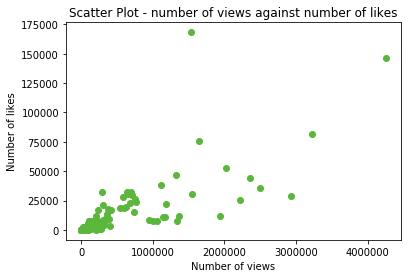

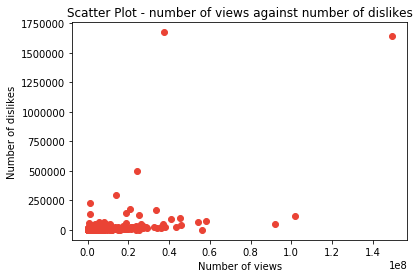

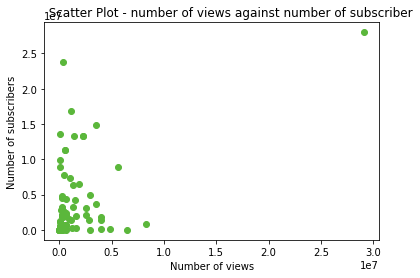

In [119]:
popl =[]
for index,value in df['likes'].iteritems():
        popl.append(index)
        

index=np.random.choice(popl,100)

xval=[]
yval=[]

for i in index:
    xval.append(df['views'].loc[i])
    yval.append(df['likes'].loc[i])
plt.scatter(xval,yval,c='#5BB73B') #positive corelation 
plt.xlabel('Number of views')
plt.ylabel('Number of likes')
plt.title('Scatter Plot - number of views against number of likes')
plt.show()
#####################################################################
popl=[]
for index,value in df['dislikes'].iteritems():
    popl.append(index)

xval =[]
yval =[]
index=np.random.choice(popl,100)
for i in index:
    xval.append(df['views'].loc[i])
    yval.append(df['likes'].loc[i])
plt.scatter(xval1,yval1,c='#EA4335') #No corelation at all
plt.xlabel('Number of views')
plt.ylabel('Number of dislikes')
plt.title('Scatter Plot - number of views against number of dislikes')
plt.show()
######################################################################
popl =[]
for index,value in df['subscriber'].iteritems():
        popl.append(index)
        

index=np.random.choice(popl,100)

xval=[]
yval=[]

for i in index:
    xval.append(df['views'].loc[i])
    yval.append(df['subscriber'].loc[i])
plt.scatter(xval,yval,c='#5BB73B') # Low positive corelation
plt.xlabel('Number of views')
plt.ylabel('Number of subscribers')
plt.title('          Scatter Plot - number of views against number of subscriber')
plt.show()

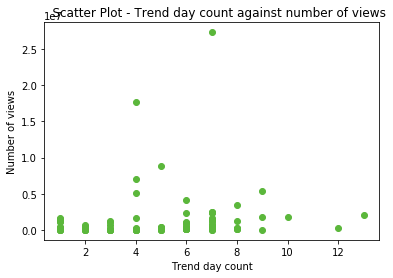

In [118]:
popl =[]
for index,value in df['trend_day_count'].iteritems():
        popl.append(index)
        

index=np.random.choice(popl,100)

xval=[]
yval=[]

for i in index:
    yval.append(df['views'].loc[i])
    xval.append(df['trend_day_count'].loc[i])
plt.scatter(xval,yval,c='#5BB73B') #No corelation- Youtube's drawback- Trend day count not resulting in more views
plt.xlabel('Trend day count')
plt.ylabel('Number of views')
plt.title('    Scatter Plot - Trend day count against number of views')
plt.show()